In [1]:
import sys
import os
from pathlib import Path
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from evaluation.prep_datasets import extract_features_not_normalised
from evaluation.evaluate_mimic import evaluate_mimic, evaluate_random
import torch

In [16]:
# Load the 100 models
num_features = 16

# for each file, load the model
models_random_100 = []
with open('..\..\datasets\\100random\\100\\results_sidebysideLM\80\hyperparameters.pkl', 'rb') as f:
    hyperparameters = pkl.load(f)
    
    folder_path = '..\..\datasets\\100random\\100\\results_sidebysideLM\80\saved_models'
    for path in os.listdir(folder_path):
        if path.endswith('.pt'):
            with open(os.path.join(folder_path, path), 'rb') as f:
                model = torch.nn.Linear(num_features, 1)
                loaded_state_dict = torch.load(f)
                model.load_state_dict(loaded_state_dict)
                models_random_100.append(model)

models_mcts_100 = []
with open('..\..\datasets\\100mcts\\100\\results_sidebysideLM\80\hyperparameters.pkl', 'rb') as f:
    hyperparameters = pkl.load(f)

    folder_path = '..\..\datasets\\100mcts\\100\\results_sidebysideLM\80\saved_models'
    for path in os.listdir(folder_path):
        if path.endswith('.pt'):
            with open(os.path.join(folder_path, path), 'rb') as f:
                model = torch.nn.Linear(num_features, 1)
                loaded_state_dict = torch.load(f)
                model.load_state_dict(loaded_state_dict)
                models_mcts_100.append(model)

models_step_100 = []
with open('..\..\datasets\\100step\\100\\results_sidebysideLM\80\hyperparameters.pkl', 'rb') as f:
    hyperparameters = pkl.load(f)

    folder_path = '..\..\datasets\\100step\\100\\results_sidebysideLM\80\saved_models'
    for path in os.listdir(folder_path):
        if path.endswith('.pt'):
            with open(os.path.join(folder_path, path), 'rb') as f:
                model = torch.nn.Linear(num_features, 1)
                loaded_state_dict = torch.load(f)
                model.load_state_dict(loaded_state_dict)
                models_step_100.append(model)

In [15]:
# Load the 1000 models
num_features = 16

# for each file, load the model
models_random_1000 = []
with open('..\..\datasets\\1000random\\1000\\results_sidebysideLM\800\hyperparameters.pkl', 'rb') as f:
    hyperparameters = pkl.load(f)
    
    folder_path = '..\..\datasets\\1000random\\1000\\results_sidebysideLM\800\saved_models'
    for path in os.listdir(folder_path):
        if path.endswith('.pt'):
            with open(os.path.join(folder_path, path), 'rb') as f:
                model = torch.nn.Linear(num_features, 1)
                loaded_state_dict = torch.load(f)
                model.load_state_dict(loaded_state_dict)
                models_random_1000.append(model)

# models_mcts_1000 = []
# with open('..\..\datasets\\1000mcts\\1000\\results_sidebysideLM\800\hyperparameters.pkl', 'rb') as f:
#     hyperparameters = pkl.load(f)

#     folder_path = '..\..\datasets\\1000mcts\\1000\\results_sidebysideLM\800\saved_models'
#     for path in os.listdir(folder_path):
#         if path.endswith('.pt'):
#             with open(os.path.join(folder_path, path), 'rb') as f:
#                 model = torch.nn.Linear(num_features, 1)
#                 loaded_state_dict = torch.load(f)
#                 model.load_state_dict(loaded_state_dict)
#                 models_mcts_1000.append(model)

models_step_1000 = []
with open('..\..\datasets\\1000step\\1000\\results_sidebysideLM\800\hyperparameters.pkl', 'rb') as f:
    hyperparameters = pkl.load(f)

    folder_path = '..\..\datasets\\1000step\\1000\\results_sidebysideLM\800\saved_models'
    for path in os.listdir(folder_path):
        if path.endswith('.pt'):
            with open(os.path.join(folder_path, path), 'rb') as f:
                model = torch.nn.Linear(num_features, 1)
                loaded_state_dict = torch.load(f)
                model.load_state_dict(loaded_state_dict)
                models_step_1000.append(model)

In [36]:
# Load the 1000 models
num_features = 16

# for each file, load the model
models_random_NN = []
folder_path = '..\..\datasets\\1000random\\1000\\results_sidebysideNN\800\saved_models'
for path in os.listdir(folder_path):
    if path.endswith('.pt'):
        with open(os.path.join(folder_path, path), 'rb') as f:
            model = torch.nn.Sequential()
            model.add_module('linear0', torch.nn.Linear(num_features, 8))
            model.add_module('relu0', torch.nn.ReLU())
            model.add_module('linear1', torch.nn.Linear(8, 4))
            model.add_module('relu1', torch.nn.ReLU())
            model.add_module('linear2', torch.nn.Linear(4, 1))
            loaded_state_dict = torch.load(f)
            model.load_state_dict(loaded_state_dict)
            models_random_NN.append(model)

# models_mcts_NN = []
#     folder_path = '..\..\datasets\\1000mcts\\1000\\results_sidebysideNN\800\saved_models'
#     for path in os.listdir(folder_path):
#         if path.endswith('.pt'):
#             with open(os.path.join(folder_path, path), 'rb') as f:
#                 model = torch.nn.Sequential()
            # model.add_module('linear0', torch.nn.Linear(num_features, 8))
            # model.add_module('relu0', torch.nn.ReLU())
            # model.add_module('linear1', torch.nn.Linear(8, 4))
            # model.add_module('relu1', torch.nn.ReLU())
            # model.add_module('linear2', torch.nn.Linear(4, 1))
#                 loaded_state_dict = torch.load(f)
#                 model.load_state_dict(loaded_state_dict)
#                 models_mcts_NN.append(model)


models_step_NN = []
folder_path = '..\..\datasets\\1000step\\1000\\results_sidebysideNN\800\saved_models'
for path in os.listdir(folder_path):
    if path.endswith('.pt'):
        with open(os.path.join(folder_path, path), 'rb') as f:
            model = torch.nn.Sequential()
            model.add_module('linear0', torch.nn.Linear(num_features, 8))
            model.add_module('relu0', torch.nn.ReLU())
            model.add_module('linear1', torch.nn.Linear(8, 4))
            model.add_module('relu1', torch.nn.ReLU())
            model.add_module('linear2', torch.nn.Linear(4, 1))
            loaded_state_dict = torch.load(f)
            model.load_state_dict(loaded_state_dict)
            models_step_NN.append(model)

In [9]:
# Load the test datasets with 200 samples
with open('..\..\datasets\\1000random\\1000\\results_sidebysideLM\800\data_split.pkl', 'rb') as f:
    _, _, test_set_random, test_labels_random = pkl.load(f)

# with open('datasets\\1000mcts\\1000\\results_sidebysideLM\800\data_split.pkl', 'rb') as f:
#     _, _, test_set_mcts, test_labels_mcts = pkl.load(f)

with open('..\..\datasets\\1000step\\1000\\results_sidebysideLM\800\data_split.pkl', 'rb') as f:
    _, _, test_set_step, test_labels_step = pkl.load(f)

# Load the test set
with open('..\..\datasets\\1000baseline\\1000\cf_features.pkl', 'rb') as f:
    cf_features = torch.tensor(pkl.load(f))
with open('..\..\datasets\\1000baseline\\1000\org_features.pkl', 'rb') as f:
    org_features = torch.tensor(pkl.load(f))

test_set_ood = torch.stack((org_features[:,:-1], cf_features[:,:-1]), dim=1).view(cf_features.shape[0], (cf_features.shape[1]-1)*2)
print(test_set_ood.shape)
test_labels_ood = org_features[:,-1] - cf_features[:,-1]

torch.Size([1000, 16])


In [12]:
def test(models, test, labels):
    test_losses_random, test_mean_errors_random, test_rmses_random, r2s_random, pearson_correlations_random, spearman_correlations_random = [], [], [], [], [], []
    for model in models:
        test_loss, test_mean_error, test_rmse, r2, pearson_correlation, spearman_correlation, pred_label_pairs = evaluate_mimic(model, test, labels, worst=False, best=False, features=['citizens_saved', 'unsaved_citizens', 'distance_to_citizen', 'standing_on_extinguisher', 'length', 'could_have_saved', 'final_number_of_unsaved_citizens', 'moved_towards_closest_citizen'])
        test_losses_random.append(test_loss)
        test_mean_errors_random.append(test_mean_error)
        test_rmses_random.append(test_rmse)
        r2s_random.append(r2)
        pearson_correlations_random.append(pearson_correlation)
        spearman_correlations_random.append(spearman_correlation)

    return test_losses_random, test_mean_errors_random, test_rmses_random, r2s_random, pearson_correlations_random, spearman_correlations_random

In [37]:
# Evaluate the models on own data
test_losses_random_100, test_mean_errors_random_100, test_rmses_random_100, r2s_random_100, pearson_correlations_random_100, spearman_correlations_random_100 = test(models_random_100, test_set_random, test_labels_random)
# test_losses_mcts_100, test_mean_errors_mcts_100, test_rmses_mcts_100, r2s_mcts_100, pearson_correlations_mcts_100, spearman_correlations_mcts_100 = test(models_mcts_100, test_set_mcts, test_labels_mcts)
test_losses_step_100, test_mean_errors_step_100, test_rmses_step_100, r2s_step_100, pearson_correlations_step_100, spearman_correlations_step_100 = test(models_step_100, test_set_step, test_labels_step)

test_losses_random_1000, test_mean_errors_random_1000, test_rmses_random_1000, r2s_random_1000, pearson_correlations_random_1000, spearman_correlations_random_1000 = test(models_random_1000, test_set_random, test_labels_random)
# test_losses_mcts_1000, test_mean_errors_mcts_1000, test_rmses_mcts_1000, r2s_mcts_1000, pearson_correlations_mcts_1000, spearman_correlations_mcts_1000 = test(models_mcts_1000, test_set_mcts, test_labels_mcts)
test_losses_step_1000, test_mean_errors_step_1000, test_rmses_step_1000, r2s_step_1000, pearson_correlations_step_1000, spearman_correlations_step_1000 = test(models_step_1000, test_set_step, test_labels_step)

test_losses_random_1000_NN, test_mean_errors_random_1000_NN, test_rmses_random_1000_NN, r2s_random_1000_NN, pearson_correlations_random_1000_NN, spearman_correlations_random_1000_NN = test(models_random_NN, test_set_random, test_labels_random)
# test_losses_mcts_1000_NN, test_mean_errors_mcts_1000_NN, test_rmses_mcts_1000_NN, r2s_mcts_1000_NN, pearson_correlations_mcts_1000_NN, spearman_correlations_mcts_1000_NN = test(models_mcts_NN, test_set_mcts, test_labels_mcts)
test_losses_step_1000_NN, test_mean_errors_step_1000_NN, test_rmses_step_1000_NN, r2s_step_1000_NN, pearson_correlations_step_1000_NN, spearman_correlations_step_1000_NN = test(models_step_NN, test_set_step, test_labels_step)

# Evaluate the models on OOD data
test_losses_random_ood_100, test_mean_errors_random_ood_100, test_rmses_random_ood_100, r2s_random_ood_100, pearson_correlations_random_ood_100, spearman_correlations_random_ood_100 = test(models_random_100, test_set_step, test_labels_step)
# test_losses_mcts_ood_100, test_mean_errors_mcts_ood_100, test_rmses_mcts_ood_100, r2s_mcts_ood_100, pearson_correlations_mcts_ood_100, spearman_correlations_mcts_ood_100 = test(models_mcts_100, test_set_ood, test_labels_ood)
test_losses_step_ood_100, test_mean_errors_step_ood_100, test_rmses_step_ood_100, r2s_step_ood_100, pearson_correlations_step_ood_100, spearman_correlations_step_ood_100 = test(models_step_100, test_set_random, test_labels_random)

test_losses_random_ood_1000, test_mean_errors_random_ood_1000, test_rmses_random_ood_1000, r2s_random_ood_1000, pearson_correlations_random_ood_1000, spearman_correlations_random_ood_1000 = test(models_random_1000, test_set_step, test_labels_step)
# test_losses_mcts_ood_1000, test_mean_errors_mcts_ood_1000, test_rmses_mcts_ood_1000, r2s_mcts_ood_1000, pearson_correlations_mcts_ood_1000, spearman_correlations_mcts_ood_1000 = test(models_mcts_1000, test_set_ood, test_labels_ood)
test_losses_step_ood_1000, test_mean_errors_step_ood_1000, test_rmses_step_ood_1000, r2s_step_ood_1000, pearson_correlations_step_ood_1000, spearman_correlations_step_ood_1000 = test(models_step_1000, test_set_random, test_labels_random)

test_losses_random_ood_1000_NN, test_mean_errors_random_ood_1000_NN, test_rmses_random_ood_1000_NN, r2s_random_ood_1000_NN, pearson_correlations_random_ood_1000_NN, spearman_correlations_random_ood_1000_NN = test(models_random_NN, test_set_step, test_labels_step)
# test_losses_mcts_ood_1000_NN, test_mean_errors_mcts_ood_1000_NN, test_rmses_mcts_ood_1000_NN, r2s_mcts_ood_1000_NN, pearson_correlations_mcts_ood_1000_NN, spearman_correlations_mcts_ood_1000_NN = test(models_mcts_NN, test_set_ood, test_labels_ood)
test_losses_step_ood_1000_NN, test_mean_errors_step_ood_1000_NN, test_rmses_step_ood_1000_NN, r2s_step_ood_1000_NN, pearson_correlations_step_ood_1000_NN, spearman_correlations_step_ood_1000_NN = test(models_step_NN, test_set_random, test_labels_random)



In [42]:
# table1 = [
#     ['measures'] + ['MCTS'] +  ['Step'] + ['Random'],
#     ['loss'] + [round(np.mean(test_losses_mcts), 2)] + [round(np.mean(test_losses_step), 2)] + [round(np.mean(test_losses_random), 2)],
#     ['mean error'] + [round(np.mean(test_mean_errors_mcts), 2)] + [round(np.mean(test_mean_errors_step), 2)] + [round(np.mean(test_mean_errors_random), 2)],
#     ['rmse'] + [round(np.mean(test_rmses_mcts), 2)] + [round(np.mean(test_rmses_step), 2)] + [round(np.mean(test_rmses_random), 2)],
#     ['r2'] + [round(np.mean(r2s_mcts), 2)] + [round(np.mean(r2s_step), 2)] + [round(np.mean(r2s_random), 2)],
#     ['pearson'] + [round(np.mean(pearson_correlations_mcts), 2)] + [round(np.mean(pearson_correlations_step), 2)] + [round(np.mean(pearson_correlations_random), 2)],
#     ['spearman'] + [round(np.mean(spearman_correlations_mcts), 2)] + [round(np.mean(spearman_correlations_step), 2)] + [round(np.mean(spearman_correlations_random), 2)]
# ]

# table1, but without mcts
table2 = [
    ['measures'] + ['Step 100'] + ['Step 1000'] + ['Random 100'] + ['Random 1000'],
    ['loss'] + [round(np.mean(test_losses_step_100), 2)] + [round(np.mean(test_losses_step_1000), 2)] + [round(np.mean(test_losses_random_100), 2)] + [round(np.mean(test_losses_random_1000), 2)],
    ['mean error'] + [round(np.mean(test_mean_errors_step_100), 2)] + [round(np.mean(test_mean_errors_step_1000), 2)] + [round(np.mean(test_mean_errors_random_100), 2)] + [round(np.mean(test_mean_errors_random_1000), 2)],
    ['rmse'] + [round(np.mean(test_rmses_step_100), 2)] + [round(np.mean(test_rmses_step_1000), 2)] + [round(np.mean(test_rmses_random_100), 2)] + [round(np.mean(test_rmses_random_1000), 2)],
    ['r2'] + [round(np.mean(r2s_step_100), 2)] + [round(np.mean(r2s_step_1000), 2)] + [round(np.mean(r2s_random_100), 2)] + [round(np.mean(r2s_random_1000), 2)],
    ['pearson'] + [round(np.mean(pearson_correlations_step_100), 2)] + [round(np.mean(pearson_correlations_step_1000), 2)] + [round(np.mean(pearson_correlations_random_100), 2)] + [round(np.mean(pearson_correlations_random_1000), 2)],
    ['spearman'] + [round(np.mean(spearman_correlations_step_100), 2)] + [round(np.mean(spearman_correlations_step_1000), 2)] + [round(np.mean(spearman_correlations_random_100), 2)] + [round(np.mean(spearman_correlations_random_1000), 2)],
    ['------'] + ['------'] + ['------'] + ['------'] + ['------'],
    ['loss ood'] + [round(np.mean(test_losses_step_ood_100), 2)] + [round(np.mean(test_losses_step_ood_1000), 2)] + [round(np.mean(test_losses_random_ood_100), 2)] + [round(np.mean(test_losses_random_ood_1000), 2)],
    ['mean error ood'] + [round(np.mean(test_mean_errors_step_ood_100), 2)] + [round(np.mean(test_mean_errors_step_ood_1000), 2)] + [round(np.mean(test_mean_errors_random_ood_100), 2)] + [round(np.mean(test_mean_errors_random_ood_1000), 2)],
    ['rmse ood'] + [round(np.mean(test_rmses_step_ood_100), 2)] + [round(np.mean(test_rmses_step_ood_1000), 2)] + [round(np.mean(test_rmses_random_ood_100), 2)] + [round(np.mean(test_rmses_random_ood_1000), 2)],
    ['r2 ood'] + [round(np.mean(r2s_step_ood_100), 2)] + [round(np.mean(r2s_step_ood_1000), 2)] + [round(np.mean(r2s_random_ood_100), 2)] + [round(np.mean(r2s_random_ood_1000), 2)],
    ['pearson ood'] + [round(np.mean(pearson_correlations_step_ood_100), 2)] + [round(np.mean(pearson_correlations_step_ood_1000), 2)] + [round(np.mean(pearson_correlations_random_ood_100), 2)] + [round(np.mean(pearson_correlations_random_ood_1000), 2)],
    ['spearman ood'] + [round(np.mean(spearman_correlations_step_ood_100), 2)] + [round(np.mean(spearman_correlations_step_ood_1000), 2)] + [round(np.mean(spearman_correlations_random_ood_100), 2)] + [round(np.mean(spearman_correlations_random_ood_1000), 2)]
]

# table2, but with step 1000 NN and random 1000 NN
table3 = [
    ['measures'] + ['Step 100'] + ['Step 1000'] + ['Step 1000 NN'] + ['Random 100'] + ['Random 1000'] + ['Random 1000 NN'],
    ['loss'] + [round(np.mean(test_losses_step_100), 2)] + [round(np.mean(test_losses_step_1000), 2)] + [round(np.mean(test_losses_step_1000_NN), 2)] + [round(np.mean(test_losses_random_100), 2)] + [round(np.mean(test_losses_random_1000), 2)] + [round(np.mean(test_losses_random_1000_NN), 2)],
    ['mean error'] + [round(np.mean(test_mean_errors_step_100), 2)] + [round(np.mean(test_mean_errors_step_1000), 2)] + [round(np.mean(test_mean_errors_step_1000_NN), 2)] + [round(np.mean(test_mean_errors_random_100), 2)] + [round(np.mean(test_mean_errors_random_1000), 2)] + [round(np.mean(test_mean_errors_random_1000_NN), 2)],
    ['rmse'] + [round(np.mean(test_rmses_step_100), 2)] + [round(np.mean(test_rmses_step_1000), 2)] + [round(np.mean(test_rmses_step_1000_NN), 2)] + [round(np.mean(test_rmses_random_100), 2)] + [round(np.mean(test_rmses_random_1000), 2)] + [round(np.mean(test_rmses_random_1000_NN), 2)],
    ['r2'] + [round(np.mean(r2s_step_100), 2)] + [round(np.mean(r2s_step_1000), 2)] + [round(np.mean(r2s_step_1000_NN), 2)] + [round(np.mean(r2s_random_100), 2)] + [round(np.mean(r2s_random_1000), 2)] + [round(np.mean(r2s_random_1000_NN), 2)],
    ['pearson'] + [round(np.mean(pearson_correlations_step_100), 2)] + [round(np.mean(pearson_correlations_step_1000), 2)] + [round(np.mean(pearson_correlations_step_1000_NN), 2)] + [round(np.mean(pearson_correlations_random_100), 2)] + [round(np.mean(pearson_correlations_random_1000), 2)] + [round(np.mean(pearson_correlations_random_1000_NN), 2)],
    ['spearman'] + [round(np.mean(spearman_correlations_step_100), 2)] + [round(np.mean(spearman_correlations_step_1000), 2)] + [round(np.mean(spearman_correlations_step_1000_NN), 2)] + [round(np.mean(spearman_correlations_random_100), 2)] + [round(np.mean(spearman_correlations_random_1000), 2)] + [round(np.mean(spearman_correlations_random_1000_NN), 2)],
    ['------'] + ['------'] + ['------'] + ['------'] + ['------'] + ['------'] + ['------'],
    ['loss ood'] + [round(np.mean(test_losses_step_ood_100), 2)] + [round(np.mean(test_losses_step_ood_1000), 2)] + [round(np.mean(test_losses_step_ood_1000_NN), 2)] + [round(np.mean(test_losses_random_ood_100), 2)] + [round(np.mean(test_losses_random_ood_1000), 2)] + [round(np.mean(test_losses_random_ood_1000_NN), 2)],
    ['mean error ood'] + [round(np.mean(test_mean_errors_step_ood_100), 2)] + [round(np.mean(test_mean_errors_step_ood_1000), 2)] + [round(np.mean(test_mean_errors_step_ood_1000_NN), 2)] + [round(np.mean(test_mean_errors_random_ood_100), 2)] + [round(np.mean(test_mean_errors_random_ood_1000), 2)] + [round(np.mean(test_mean_errors_random_ood_1000_NN), 2)],
    ['rmse ood'] + [round(np.mean(test_rmses_step_ood_100), 2)] + [round(np.mean(test_rmses_step_ood_1000), 2)] + [round(np.mean(test_rmses_step_ood_1000_NN), 2)] + [round(np.mean(test_rmses_random_ood_100), 2)] + [round(np.mean(test_rmses_random_ood_1000), 2)] + [round(np.mean(test_rmses_random_ood_1000_NN), 2)],
    ['r2 ood'] + [round(np.mean(r2s_step_ood_100), 2)] + [round(np.mean(r2s_step_ood_1000), 2)] + [round(np.mean(r2s_step_ood_1000_NN), 2)] + [round(np.mean(r2s_random_ood_100), 2)] + [round(np.mean(r2s_random_ood_1000), 2)] + [round(np.mean(r2s_random_ood_1000_NN), 2)],
    ['pearson ood'] + [round(np.mean(pearson_correlations_step_ood_100), 2)] + [round(np.mean(pearson_correlations_step_ood_1000), 2)] + [round(np.mean(pearson_correlations_step_ood_1000_NN), 2)] + [round(np.mean(pearson_correlations_random_ood_100), 2)] + [round(np.mean(pearson_correlations_random_ood_1000), 2)] + [round(np.mean(pearson_correlations_random_ood_1000_NN), 2)],
    ['spearman ood'] + [round(np.mean(spearman_correlations_step_ood_100), 2)] + [round(np.mean(spearman_correlations_step_ood_1000), 2)] + [round(np.mean(spearman_correlations_step_ood_1000_NN), 2)] + [round(np.mean(spearman_correlations_random_ood_100), 2)] + [round(np.mean(spearman_correlations_random_ood_1000), 2)] + [round(np.mean(spearman_correlations_random_ood_1000_NN), 2)]
]
print(tabulate(table3, headers='firstrow'))
# print(tabulate(table1, headers='firstrow', tablefmt='latex'))

measures        Step 100    Step 1000    Step 1000 NN    Random 100    Random 1000    Random 1000 NN
--------------  ----------  -----------  --------------  ------------  -------------  ----------------
loss            0.78        0.55         0.14            1.01          0.34           0.06
mean error      0.6         0.51         0.24            0.73          0.43           0.16
rmse            0.88        0.74         0.37            1.0           0.58           0.24
r2              -0.01       0.29         0.82            -0.93         0.35           0.89
pearson         0.46        0.56         0.91            -0.05         0.6            0.95
spearman        0.22        0.2          0.72            -0.13         0.46           0.89
------          ------      ------       ------          ------        ------         ------
loss ood        1.66        1.36         2.31            1.23          1.11           1.92
mean error ood  0.99        0.94         1.16            0.84     

### Observation
Across all measures and models the 1000 sample one performs significantly better!

In [21]:
def get_predictions(models, test):
    predictions = []
    for model in models:
        predictions.append(model(test).detach().numpy())
    return predictions

In [44]:
# Get predictions on the own dataset

preds_step_100 = get_predictions(models_step_100, test_set_step)
preds_step_1000 = get_predictions(models_step_1000, test_set_step)
preds_step_NN = get_predictions(models_step_NN, test_set_step)
preds_random_100 = get_predictions(models_random_100, test_set_random)
preds_random_1000 = get_predictions(models_random_1000, test_set_random)
preds_random_NN = get_predictions(models_random_NN, test_set_random)

# preds_mcts_100 = get_predictions(models_mcts_100, test_set_mcts)
# preds_mcts_1000 = get_predictions(models_mcts_1000, test_set_mcts)

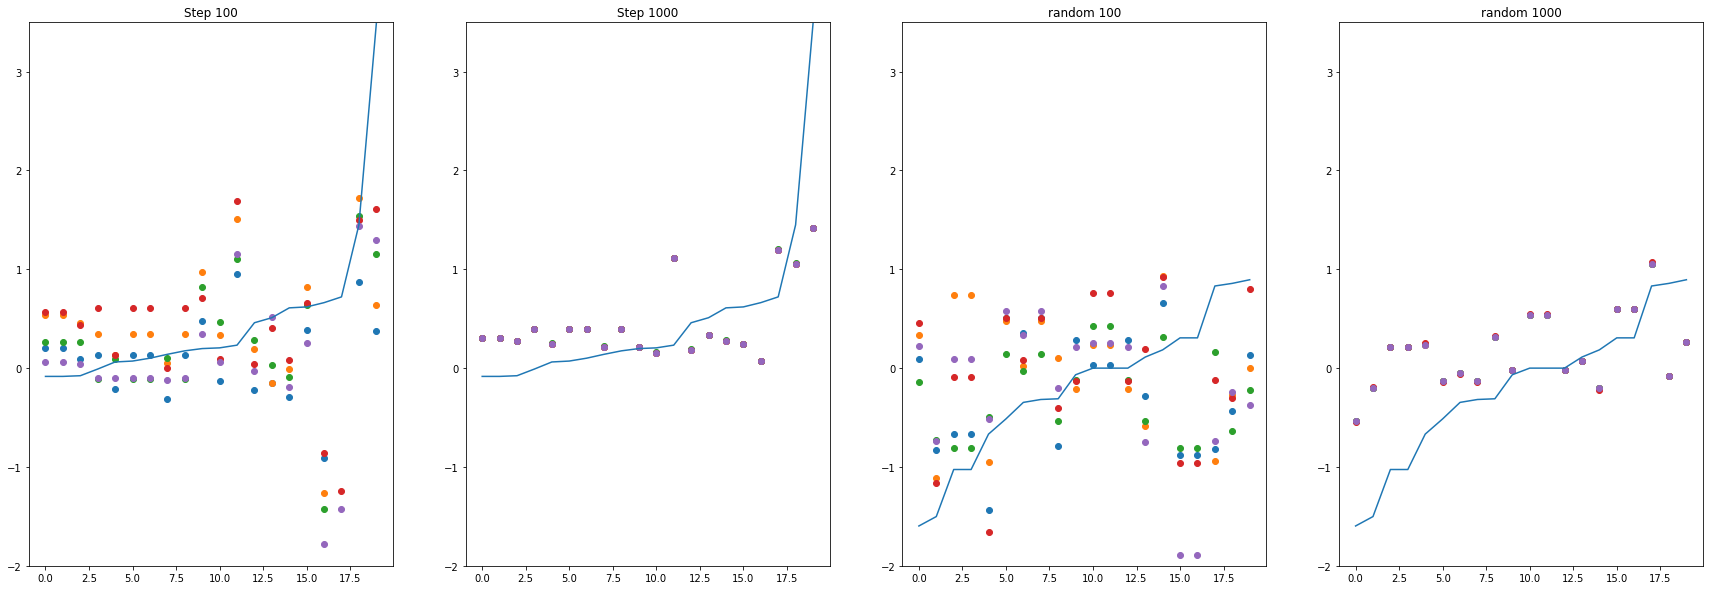

Text(0.5, 1.0, 'random 1000 NN')

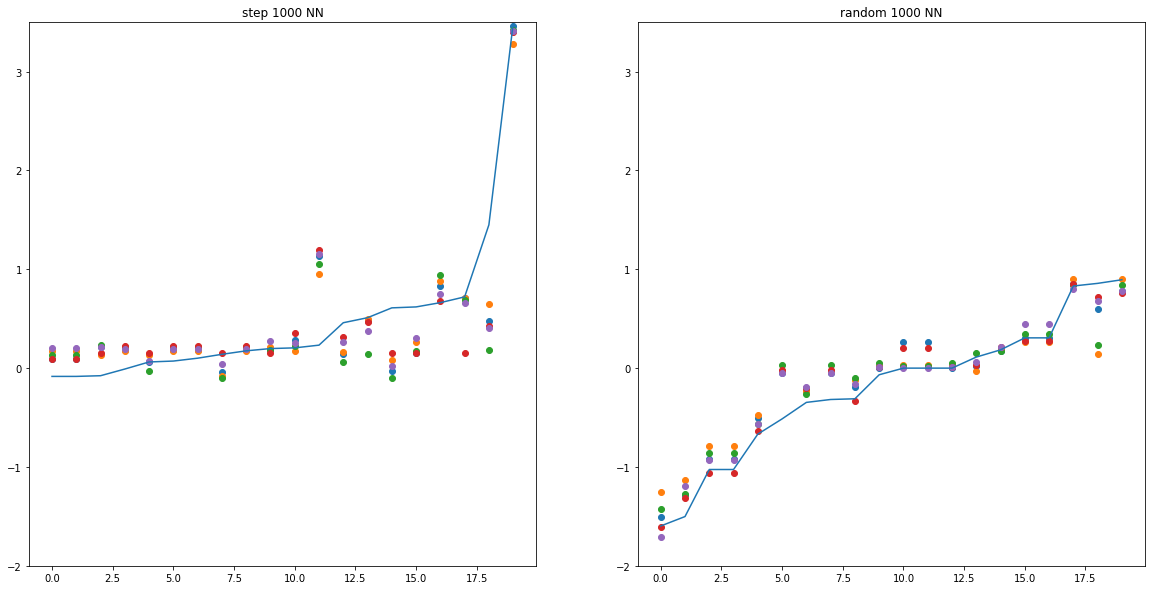

In [46]:
# visualize the predictions of different models
plt.figure(figsize=(30,10))
num_samples = 20
x = np.arange(0, 20)

paired_lists = [list(zip(pred, test_labels_step[:num_samples])) for pred in preds_step_100[:num_samples]]
sorted_pairs = [sorted(item, key=lambda x: x[1]) for item in paired_lists]
sorted_preds_step = [[item[0] for item in pair_list] for pair_list in sorted_pairs]

plt.subplot(1,4,1)
plt.ylim(-2, 3.5)
plt.scatter(x, sorted_preds_step[0], label='step')
plt.scatter(x, sorted_preds_step[1][:20], label='step')
plt.scatter(x, sorted_preds_step[2][:20], label='step')
plt.scatter(x, sorted_preds_step[3][:20], label='step')
plt.scatter(x, sorted_preds_step[4][:20], label='step')
plt.plot(x, sorted(test_labels_step[:20].detach().numpy()), label='actual')
plt.title('Step 100')

paired_lists = [list(zip(pred, test_labels_step[:num_samples])) for pred in preds_step_1000[:num_samples]]
sorted_pairs = [sorted(item, key=lambda x: x[1]) for item in paired_lists]
sorted_preds_step = [[item[0] for item in pair_list] for pair_list in sorted_pairs]

plt.subplot(1,4,2)
plt.ylim(-2, 3.5)
plt.scatter(x, sorted_preds_step[0], label='step')
plt.scatter(x, sorted_preds_step[1][:20], label='step')
plt.scatter(x, sorted_preds_step[2][:20], label='step')
plt.scatter(x, sorted_preds_step[3][:20], label='step')
plt.scatter(x, sorted_preds_step[4][:20], label='step')
plt.plot(x, sorted(test_labels_step[:20].detach().numpy()), label='actual')
plt.title('Step 1000')

paired_lists = [list(zip(pred, test_labels_random[:num_samples])) for pred in preds_random_100[:num_samples]]
sorted_pairs = [sorted(item, key=lambda x: x[1]) for item in paired_lists]
sorted_preds_random = [[item[0] for item in pair_list] for pair_list in sorted_pairs]

plt.subplot(1,4,3)
plt.ylim(-2, 3.5)
plt.scatter(x, sorted_preds_random[0], label='random')
plt.scatter(x, sorted_preds_random[1][:20], label='random')
plt.scatter(x, sorted_preds_random[2][:20], label='random')
plt.scatter(x, sorted_preds_random[3][:20], label='random')
plt.scatter(x, sorted_preds_random[4][:20], label='random')
plt.plot(x, sorted(test_labels_random[:20].detach().numpy()), label='actual')
plt.title('random 100')

paired_lists = [list(zip(pred, test_labels_random[:num_samples])) for pred in preds_random_1000[:num_samples]]
sorted_pairs = [sorted(item, key=lambda x: x[1]) for item in paired_lists]
sorted_preds_random = [[item[0] for item in pair_list] for pair_list in sorted_pairs]

plt.subplot(1,4,4)
plt.ylim(-2, 3.5)
plt.scatter(x, sorted_preds_random[0], label='random')
plt.scatter(x, sorted_preds_random[1][:20], label='random')
plt.scatter(x, sorted_preds_random[2][:20], label='random')
plt.scatter(x, sorted_preds_random[3][:20], label='random')
plt.scatter(x, sorted_preds_random[4][:20], label='random')
plt.plot(x, sorted(test_labels_random[:20].detach().numpy()), label='actual')
plt.title('random 1000')

plt.show()


plt.figure(figsize=(20,10))

paired_lists = [list(zip(pred, test_labels_step[:num_samples])) for pred in preds_step_NN[:num_samples]]
sorted_pairs = [sorted(item, key=lambda x: x[1]) for item in paired_lists]
sorted_preds_step = [[item[0] for item in pair_list] for pair_list in sorted_pairs]

plt.subplot(1,2,1)
plt.ylim(-2, 3.5)
plt.scatter(x, sorted_preds_step[0], label='step')
plt.scatter(x, sorted_preds_step[1][:20], label='step')
plt.scatter(x, sorted_preds_step[2][:20], label='step')
plt.scatter(x, sorted_preds_step[3][:20], label='step')
plt.scatter(x, sorted_preds_step[4][:20], label='step')
plt.plot(x, sorted(test_labels_step[:20].detach().numpy()), label='actual')
plt.title('step 1000 NN')

paired_lists = [list(zip(pred, test_labels_random[:num_samples])) for pred in preds_random_NN[:num_samples]]
sorted_pairs = [sorted(item, key=lambda x: x[1]) for item in paired_lists]
sorted_preds_random = [[item[0] for item in pair_list] for pair_list in sorted_pairs]

plt.subplot(1,2,2)
plt.ylim(-2, 3.5)
plt.scatter(x, sorted_preds_random[0], label='random')
plt.scatter(x, sorted_preds_random[1][:20], label='random')
plt.scatter(x, sorted_preds_random[2][:20], label='random')
plt.scatter(x, sorted_preds_random[3][:20], label='random')
plt.scatter(x, sorted_preds_random[4][:20], label='random')
plt.plot(x, sorted(test_labels_random[:20].detach().numpy()), label='actual')
plt.title('random 1000 NN')

## OOD

In [49]:
# Get predictions on the own dataset

preds_step_100 = get_predictions(models_step_100, test_set_random)
preds_step_1000 = get_predictions(models_step_1000, test_set_random)
preds_step_NN = get_predictions(models_step_NN, test_set_random)
preds_random_100 = get_predictions(models_random_100, test_set_step)
preds_random_1000 = get_predictions(models_random_1000, test_set_step)
preds_random_NN = get_predictions(models_random_NN, test_set_step)
# preds_mcts_100 = get_predictions(models_mcts_100, test_set_mcts)
# preds_mcts_1000 = get_predictions(models_mcts_1000, test_set_mcts)

In [29]:
# Evaluate the models on OOD data
test_losses_random_ood_100, test_mean_errors_random_ood_100, test_rmses_random_ood_100, r2s_random_ood_100, pearson_correlations_random_ood_100, spearman_correlations_random_ood_100 = test(models_random_100, test_set_step, test_labels_step)
# test_losses_mcts_ood_100, test_mean_errors_mcts_ood_100, test_rmses_mcts_ood_100, r2s_mcts_ood_100, pearson_correlations_mcts_ood_100, spearman_correlations_mcts_ood_100 = test(models_mcts_100, test_set_ood, test_labels_ood)
test_losses_step_ood_100, test_mean_errors_step_ood_100, test_rmses_step_ood_100, r2s_step_ood_100, pearson_correlations_step_ood_100, spearman_correlations_step_ood_100 = test(models_step_100, test_set_random, test_labels_random)

test_losses_random_ood_1000, test_mean_errors_random_ood_1000, test_rmses_random_ood_1000, r2s_random_ood_1000, pearson_correlations_random_ood_1000, spearman_correlations_random_ood_1000 = test(models_random_1000, test_set_step, test_labels_step)
# test_losses_mcts_ood_1000, test_mean_errors_mcts_ood_1000, test_rmses_mcts_ood_1000, r2s_mcts_ood_1000, pearson_correlations_mcts_ood_1000, spearman_correlations_mcts_ood_1000 = test(models_mcts_1000, test_set_ood, test_labels_ood)
test_losses_step_ood_1000, test_mean_errors_step_ood_1000, test_rmses_step_ood_1000, r2s_step_ood_1000, pearson_correlations_step_ood_1000, spearman_correlations_step_ood_1000 = test(models_step_1000, test_set_random, test_labels_random)

In [30]:
# table1, but without mcts
table1 = [
    ['measures'] + ['Step 100'] + ['Step 1000'] + ['Random 100'] + ['Random 1000'],
    ['loss ood'] + [round(np.mean(test_losses_step_ood_100), 2)] + [round(np.mean(test_losses_step_ood_1000), 2)] + [round(np.mean(test_losses_random_ood_100), 2)] + [round(np.mean(test_losses_random_ood_1000), 2)],
    ['mean error ood'] + [round(np.mean(test_mean_errors_step_ood_100), 2)] + [round(np.mean(test_mean_errors_step_ood_1000), 2)] + [round(np.mean(test_mean_errors_random_ood_100), 2)] + [round(np.mean(test_mean_errors_random_ood_1000), 2)],
    ['rmse ood'] + [round(np.mean(test_rmses_step_ood_100), 2)] + [round(np.mean(test_rmses_step_ood_1000), 2)] + [round(np.mean(test_rmses_random_ood_100), 2)] + [round(np.mean(test_rmses_random_ood_1000), 2)],
    ['r2 ood'] + [round(np.mean(r2s_step_ood_100), 2)] + [round(np.mean(r2s_step_ood_1000), 2)] + [round(np.mean(r2s_random_ood_100), 2)] + [round(np.mean(r2s_random_ood_1000), 2)],
    ['pearson ood'] + [round(np.mean(pearson_correlations_step_ood_100), 2)] + [round(np.mean(pearson_correlations_step_ood_1000), 2)] + [round(np.mean(pearson_correlations_random_ood_100), 2)] + [round(np.mean(pearson_correlations_random_ood_1000), 2)],
    ['spearman ood'] + [round(np.mean(spearman_correlations_step_ood_100), 2)] + [round(np.mean(spearman_correlations_step_ood_1000), 2)] + [round(np.mean(spearman_correlations_random_ood_100), 2)] + [round(np.mean(spearman_correlations_random_ood_1000), 2)]
]

print(tabulate(table1, headers='firstrow'))
# print(tabulate(table1, headers='firstrow', tablefmt='latex'))

measures          Step 100    Step 1000    Random 100    Random 1000
--------------  ----------  -----------  ------------  -------------
loss ood              1.66         1.36          1.23           1.11
mean error ood        0.99         0.94          0.84           0.73
rmse ood              1.28         1.16          1.11           1.05
r2 ood               -2.17        -1.59         -0.6           -0.44
pearson ood          -0.16         0.07          0.18          -0.04
spearman ood         -0.23        -0.1           0.05          -0.01


Also in generalising, bigger datasets are reliably bigger

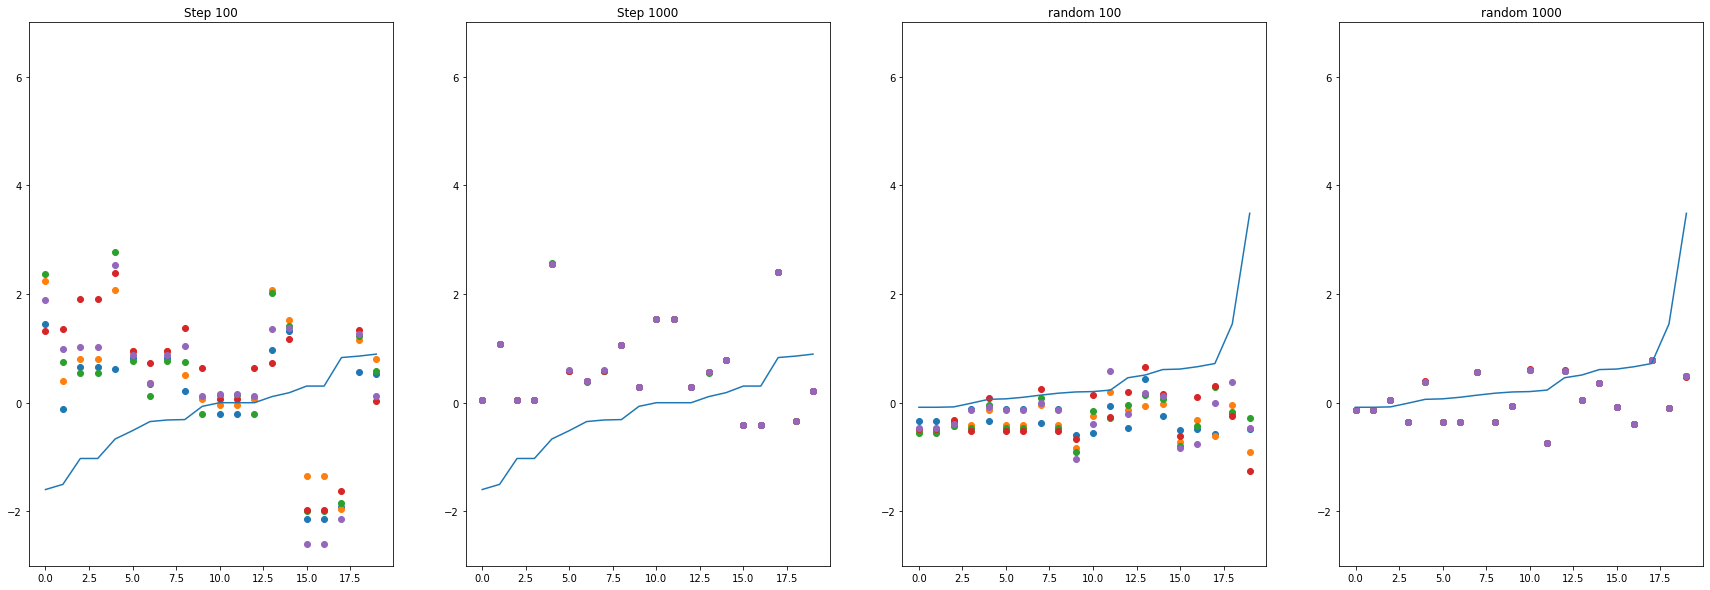

Text(0.5, 1.0, 'random 1000 NN on step data')

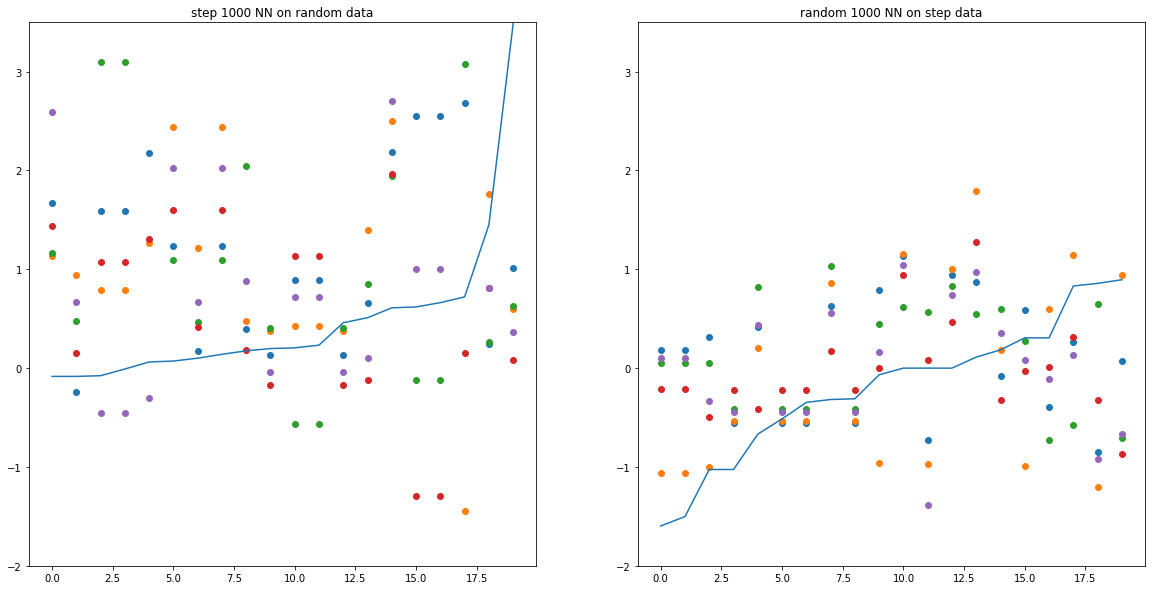

In [50]:
# visualize the predictions of different models
plt.figure(figsize=(30,10))
num_samples = 20
x = np.arange(0, 20)

paired_lists = [list(zip(pred, test_labels_random[:num_samples])) for pred in preds_step_100[:num_samples]]
sorted_pairs = [sorted(item, key=lambda x: x[1]) for item in paired_lists]
sorted_preds_step = [[item[0] for item in pair_list] for pair_list in sorted_pairs]

plt.subplot(1,4,1)
plt.ylim(-3, 7)
plt.scatter(x, sorted_preds_step[0], label='step')
plt.scatter(x, sorted_preds_step[1][:20], label='step')
plt.scatter(x, sorted_preds_step[2][:20], label='step')
plt.scatter(x, sorted_preds_step[3][:20], label='step')
plt.scatter(x, sorted_preds_step[4][:20], label='step')
plt.plot(x, sorted(test_labels_random[:20].detach().numpy()), label='actual')
plt.title('Step 100')

paired_lists = [list(zip(pred, test_labels_random[:num_samples])) for pred in preds_step_1000[:num_samples]]
sorted_pairs = [sorted(item, key=lambda x: x[1]) for item in paired_lists]
sorted_preds_step = [[item[0] for item in pair_list] for pair_list in sorted_pairs]

plt.subplot(1,4,2)
plt.ylim(-3, 7)
plt.scatter(x, sorted_preds_step[0], label='step')
plt.scatter(x, sorted_preds_step[1][:20], label='step')
plt.scatter(x, sorted_preds_step[2][:20], label='step')
plt.scatter(x, sorted_preds_step[3][:20], label='step')
plt.scatter(x, sorted_preds_step[4][:20], label='step')
plt.plot(x, sorted(test_labels_random[:20].detach().numpy()), label='actual')
plt.title('Step 1000')

paired_lists = [list(zip(pred, test_labels_step[:num_samples])) for pred in preds_random_100[:num_samples]]
sorted_pairs = [sorted(item, key=lambda x: x[1]) for item in paired_lists]
sorted_preds_random = [[item[0] for item in pair_list] for pair_list in sorted_pairs]

plt.subplot(1,4,3)
plt.ylim(-3, 7)
plt.scatter(x, sorted_preds_random[0], label='random')
plt.scatter(x, sorted_preds_random[1][:20], label='random')
plt.scatter(x, sorted_preds_random[2][:20], label='random')
plt.scatter(x, sorted_preds_random[3][:20], label='random')
plt.scatter(x, sorted_preds_random[4][:20], label='random')
plt.plot(x, sorted(test_labels_step[:20].detach().numpy()), label='actual')
plt.title('random 100')

paired_lists = [list(zip(pred, test_labels_step[:num_samples])) for pred in preds_random_1000[:num_samples]]
sorted_pairs = [sorted(item, key=lambda x: x[1]) for item in paired_lists]
sorted_preds_random = [[item[0] for item in pair_list] for pair_list in sorted_pairs]

plt.subplot(1,4,4)
plt.ylim(-3, 7)
plt.scatter(x, sorted_preds_random[0], label='random')
plt.scatter(x, sorted_preds_random[1][:20], label='random')
plt.scatter(x, sorted_preds_random[2][:20], label='random')
plt.scatter(x, sorted_preds_random[3][:20], label='random')
plt.scatter(x, sorted_preds_random[4][:20], label='random')
plt.plot(x, sorted(test_labels_step[:20].detach().numpy()), label='actual')
plt.title('random 1000')

plt.show()


plt.figure(figsize=(20,10))

paired_lists = [list(zip(pred, test_labels_random[:num_samples])) for pred in preds_step_NN[:num_samples]]
sorted_pairs = [sorted(item, key=lambda x: x[1]) for item in paired_lists]
sorted_preds_step = [[item[0] for item in pair_list] for pair_list in sorted_pairs]

plt.subplot(1,2,1)
plt.ylim(-2, 3.5)
plt.scatter(x, sorted_preds_step[0], label='step')
plt.scatter(x, sorted_preds_step[1][:20], label='step')
plt.scatter(x, sorted_preds_step[2][:20], label='step')
plt.scatter(x, sorted_preds_step[3][:20], label='step')
plt.scatter(x, sorted_preds_step[4][:20], label='step')
plt.plot(x, sorted(test_labels_step[:20].detach().numpy()), label='actual')
plt.title('step 1000 NN on random data')

paired_lists = [list(zip(pred, test_labels_step[:num_samples])) for pred in preds_random_NN[:num_samples]]
sorted_pairs = [sorted(item, key=lambda x: x[1]) for item in paired_lists]
sorted_preds_random = [[item[0] for item in pair_list] for pair_list in sorted_pairs]

plt.subplot(1,2,2)
plt.ylim(-2, 3.5)
plt.scatter(x, sorted_preds_random[0], label='random')
plt.scatter(x, sorted_preds_random[1][:20], label='random')
plt.scatter(x, sorted_preds_random[2][:20], label='random')
plt.scatter(x, sorted_preds_random[3][:20], label='random')
plt.scatter(x, sorted_preds_random[4][:20], label='random')
plt.plot(x, sorted(test_labels_random[:20].detach().numpy()), label='actual')
plt.title('random 1000 NN on step data')

Random generalises better to step than step generalises to random